In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
c02_data = pd.read_csv('FuelConsumptionCo2.csv')
c02_data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
c02_data.drop('MODELYEAR', axis=1, inplace=True)

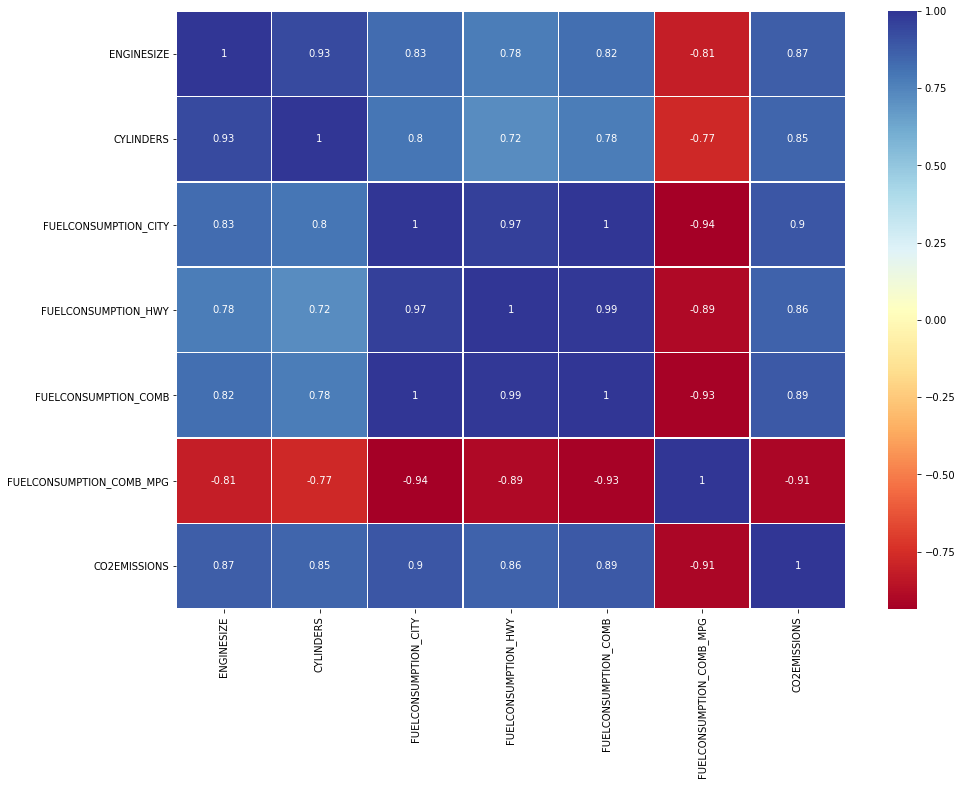

In [4]:
plt.figure(figsize=(15,11))
sns.heatmap(c02_data.corr(),annot= True, cmap = 'RdYlBu',linewidths=0.5)

In [5]:
c02_data.isnull().sum()

MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [6]:
c02_data.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [7]:
c02_data.dtypes

MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [8]:
c02_data.columns

Index(['MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

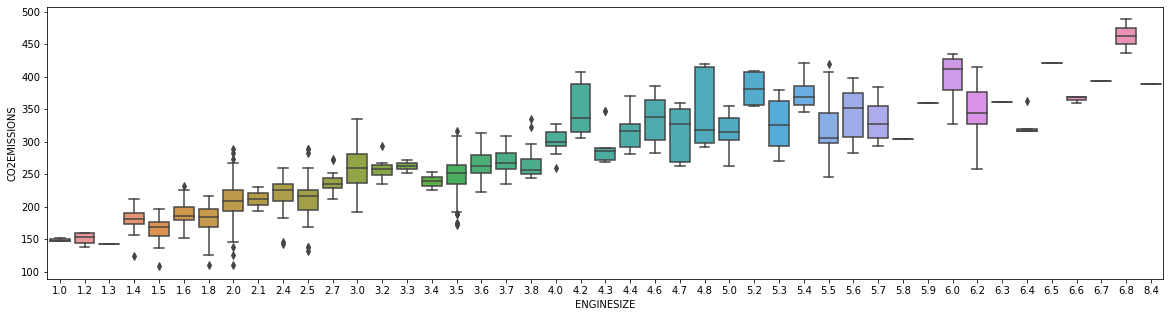

In [9]:
plt.figure(figsize=(20,5))
sns.boxplot(x="ENGINESIZE", y="CO2EMISSIONS", data=c02_data)

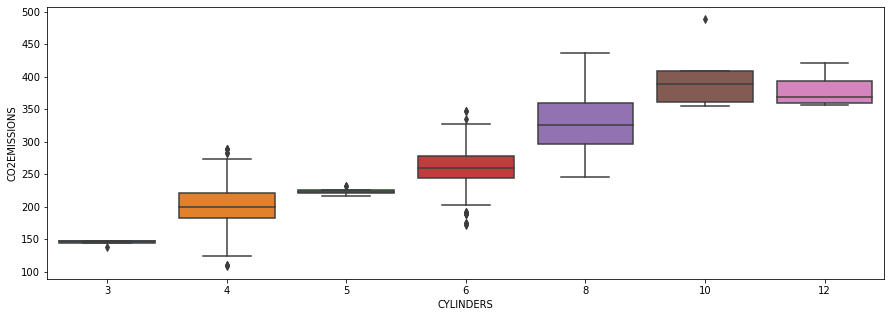

In [10]:
plt.figure(figsize=(15,5))
sns.boxplot(x="CYLINDERS", y="CO2EMISSIONS", data=c02_data)

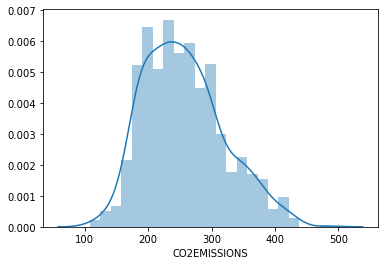

In [11]:
sns.distplot(c02_data['CO2EMISSIONS'])

In [12]:
x = c02_data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB']].values
y = c02_data[['CO2EMISSIONS']].values
X = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=.20, random_state=1)
LM = linear_model.LinearRegression()
LM.fit(train_x, train_y)

LinearRegression()

In [13]:
LM.intercept_

array([256.57393286])

In [14]:
LM.coef_

array([[16.51204568, 11.41661804, 14.33807371, 20.28257304]])

In [15]:
yhat = LM.predict(test_x)
yhat

array([[256.75704489],
       [194.15911028],
       [198.59613505],
       [184.26732751],
       [307.12244785],
       [222.50781325],
       [187.29786071],
       [193.81661652],
       [235.67228099],
       [197.67147139],
       [218.64119404],
       [260.83455544],
       [201.51657822],
       [364.34647038],
       [201.40161416],
       [192.54706069],
       [192.87988361],
       [315.04258962],
       [262.35833227],
       [216.07778948],
       [443.45109856],
       [215.61305924],
       [255.02268162],
       [258.16345926],
       [278.55348761],
       [240.33196144],
       [161.58818874],
       [287.10160456],
       [186.35633098],
       [232.03079306],
       [228.91400342],
       [368.42398093],
       [246.74782245],
       [361.77369989],
       [284.97863736],
       [315.75674405],
       [351.18725876],
       [179.83037993],
       [343.81509157],
       [257.46145128],
       [240.33196144],
       [371.5984174 ],
       [215.13858096],
       [258

In [16]:
print('R^2 SCORE:', LM.score(test_x, test_y))
print('MSE:', mean_squared_error(test_y, yhat))

R^2 SCORE: 0.8640143908947837
MSE: 551.6184790131966


In [17]:
X[:1]

array([[-0.9512918 , -0.99896853, -0.82855772, -0.88430407]])

In [18]:
LM.predict([[-0.9512918 , -0.99896853, -0.82855772, -0.88430407]])

array([[199.64543351]])

In [19]:
y[:1]

array([[196]])